### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

# Part 1: getting familiar with the data

In [3]:
# I weant to see all of the cloumn headers (I have a huge monitor, so might as well)
# Also, I want to see a random sample and just just the first few columns
pd.set_option('display.max_columns', None)
data.sample(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1199,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,31,Married partner,1,Some college - no degree,Sales & Related,$12500 - $24999,NaN,1~3,NaN,4~8,4~8,NaN,1,1,0,0,1,1
11944,Home,Alone,Rainy,55,10PM,Coffee House,2h,Female,31,Married partner,0,Some college - no degree,Computer & Mathematical,$100000 or More,NaN,less1,less1,gt8,4~8,less1,1,0,0,1,0,0
7759,No Urgent Place,Partner,Sunny,80,10PM,Restaurant(<20),1d,Male,21,Unmarried partner,0,Bachelors degree,Business & Financial,$62500 - $74999,NaN,4~8,1~3,4~8,1~3,less1,1,1,0,0,1,1
11940,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Female,31,Married partner,0,Some college - no degree,Computer & Mathematical,$100000 or More,NaN,less1,less1,gt8,4~8,less1,1,1,0,0,1,0
4330,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),1d,Female,31,Unmarried partner,1,Bachelors degree,Sales & Related,$37500 - $49999,NaN,1~3,less1,4~8,4~8,less1,1,1,0,0,1,1


2. Investigate the dataset for missing or problematic data.

In [4]:
# first, let us check the info.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [5]:
#let us look at the summary statistics for numerical columns
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
#let us sum the nuls by clumn
data.isnull().sum().sort_values()

destination                 0
direction_same              0
toCoupon_GEQ25min           0
toCoupon_GEQ15min           0
toCoupon_GEQ5min            0
income                      0
direction_opp               0
education                   0
has_children                0
occupation                  0
age                         0
gender                      0
expiration                  0
coupon                      0
time                        0
temperature                 0
weather                     0
passanger                   0
maritalStatus               0
Y                           0
Bar                       107
RestaurantLessThan20      130
CarryAway                 151
Restaurant20To50          189
CoffeeHouse               217
car                     12576
dtype: int64

<AxesSubplot:title={'center':'NaN / Null value counts by column'}>

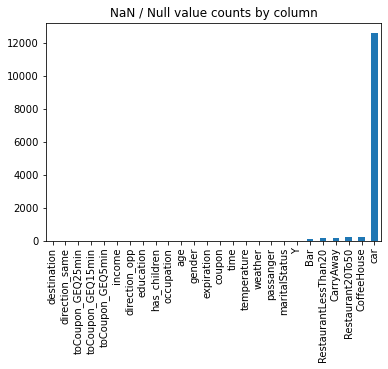

In [7]:
#Let us make a bar blot to visualize the null counts
data.isnull().sum().sort_values().plot(kind = 'bar', title = 'NaN / Null value counts by column')

**Observations:**
- 'Bar', 'RestaurantLessThan20', 'CarryAway', 'Restaurant20To50', and 'CoffeeHouse' contain some (100-200) NaN values. 
- The "car" field mostly consists of NaN values (12,576 out of 12,684). 

# Part 2: dealing with missing values

3. Decide what to do about your missing data -- drop, replace, other...

- If we are to use the data for creating a model, we might want to impute the first group of fields,
sich as: 'Bar', 'RestaurantLessThan20', 'CarryAway', 'Restaurant20To50', and 'CoffeeHouse' 
   - For categorical fields we will use Mode and for numerical fields we will include Median

- We will want to get rid of the "car" column altogether, since it mostly consists of the null values.

In [8]:
#First, let us drop the "car" column. We will create a new dataframe without that column and preserve the original dataframe just in case.
df = data.drop(columns=['car'])
pd.set_option('display.max_columns', None)
df.sample(3)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
5019,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,31,Married partner,0,Some college - no degree,Unemployed,$50000 - $62499,never,never,1~3,gt8,1~3,1,1,1,0,1,0
2541,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,26,Single,0,Some college - no degree,Office & Administrative Support,$37500 - $49999,4~8,4~8,4~8,4~8,less1,1,1,0,0,1,1
8851,No Urgent Place,Alone,Sunny,80,10PM,Restaurant(<20),1d,Male,26,Married partner,1,Bachelors degree,Computer & Mathematical,$50000 - $62499,never,1~3,1~3,1~3,1~3,1,0,0,0,1,1


In [9]:
'''
Now, let us now impute the NaNs in the remainign columns: ('Bar', 'RestaurantLessThan20', 'CarryAway', 'Restaurant20To50', and 'CoffeeHouse' )
The data type for all of the remaining columns with missing values is "Object"
Therefore, we will impute the missing values in these columns with Mode
'''

# for the sake of efficiency, let us create a list of all columns iwth missing 
cols = ['Bar', 'RestaurantLessThan20', 'CarryAway', 'Restaurant20To50', 'CoffeeHouse']

for c in cols:
    modec = df[c].mode()[0]
    df[c] = df[c].fillna(modec)
    
'''
Now let us confirm that the null values disappeared
'''
df.isnull().sum().sort_values()

destination             0
direction_same          0
toCoupon_GEQ25min       0
toCoupon_GEQ15min       0
toCoupon_GEQ5min        0
Restaurant20To50        0
RestaurantLessThan20    0
CarryAway               0
CoffeeHouse             0
Bar                     0
income                  0
direction_opp           0
occupation              0
has_children            0
maritalStatus           0
age                     0
gender                  0
expiration              0
coupon                  0
time                    0
temperature             0
weather                 0
passanger               0
education               0
Y                       0
dtype: int64

In [10]:
#Looks like the null values are gone. Hurray! Just in case, let us see the info to double-confirm:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12684 non-null  object
 15  CoffeeHouse           12684 non-null

Beautiful!

# Part 3: additional data cleanup

I noticed that certain columns contain the values such as "never" and "less1" (less than 1). For example:

**CoffeeHouse**: Number of times that he/she/they goes to a coffee house: 
- 0, less than 1, 1 to 3, 4 to 8
Since number of time one goes to a coffee house cannot be negative (e.g., -4 times) or fractional (e.g., 0.8 times), we should think that "less than 1" is the same as "0"
Let us replace both "never" and "less1" with "0".

In [11]:
df=df.replace('never','0')
df=df.replace('less1','0')
#after the replacements, let us look at a sample again
df.sample(3)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
11681,Home,Partner,Sunny,30,6PM,Restaurant(<20),1d,Female,41,Married partner,1,Graduate degree (Masters or Doctorate),Management,$75000 - $87499,0,1~3,4~8,1~3,0,1,1,1,0,1,1
12300,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Female,50plus,Widowed,1,High School Graduate,Retired,$12500 - $24999,0,0,4~8,1~3,0,1,0,0,0,1,1
10750,Work,Alone,Rainy,55,7AM,Carry out & Take away,2h,Female,41,Married partner,1,Graduate degree (Masters or Doctorate),Food Preparation & Serving Related,$100000 or More,0,gt8,4~8,4~8,4~8,1,1,0,1,0,0


Next, let us look at all of the unique values of all columns to see if there are any other odd things that need to be fixed. 

In [12]:
# Let us define function for priting the unique values and then apply it to our our latest dataframe. To make it more visual, let us bold the colunm names.
# We will also sort the values alphabetically, so that they are easier to read.
# ANSI escape sequence for bold text
BOLD = '\033[1m'
# ANSI escape sequence to reset text formatting
RESET = '\033[0m'
def print_unique_values(dataframe):
    for column in dataframe.columns:
        unique_vals = sorted(dataframe[column].unique())  # Sort unique values
        print(f"{BOLD}{column}{RESET}")
        print(f"{unique_vals}")
        print("---")
print_unique_values(df)

destination
['Home', 'No Urgent Place', 'Work']
---
passanger
['Alone', 'Friend(s)', 'Kid(s)', 'Partner']
---
weather
['Rainy', 'Snowy', 'Sunny']
---
temperature
[30, 55, 80]
---
time
['10AM', '10PM', '2PM', '6PM', '7AM']
---
coupon
['Bar', 'Carry out & Take away', 'Coffee House', 'Restaurant(20-50)', 'Restaurant(<20)']
---
expiration
['1d', '2h']
---
gender
['Female', 'Male']
---
age
['21', '26', '31', '36', '41', '46', '50plus', 'below21']
---
maritalStatus
['Divorced', 'Married partner', 'Single', 'Unmarried partner', 'Widowed']
---
has_children
[0, 1]
---
education
['Associates degree', 'Bachelors degree', 'Graduate degree (Masters or Doctorate)', 'High School Graduate', 'Some High School', 'Some college - no degree']
---
occupation
['Architecture & Engineering', 'Arts Design Entertainment Sports & Media', 'Building & Grounds Cleaning & Maintenance', 'Business & Financial', 'Community & Social Services', 'Computer & Mathematical', 'Construction & Extraction', 'Education&Training&Li

**Observations**
- After the latest clean up, there are no more weird or duplicate values
- The only odd thing is that "toCoupon_GEQ5min" value is always equal to 1. Thus, it is nor a useful variable (for all records). Let us drop in in the next cell.

In [13]:
#Droppiong the useless "toCoupon_GEQ5min" column
df = df.drop(columns=['toCoupon_GEQ5min'])
pd.set_option('display.max_columns', None)
df.sample(3)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
12338,Home,Partner,Sunny,30,10PM,Bar,2h,Male,31,Married partner,1,Some college - no degree,Computer & Mathematical,$37500 - $49999,0,0,1~3,1~3,1~3,1,1,0,1,0
12121,Home,Alone,Snowy,30,10PM,Coffee House,2h,Female,36,Married partner,0,Bachelors degree,Unemployed,$25000 - $37499,0,1~3,4~8,4~8,4~8,1,0,0,1,0
4575,No Urgent Place,Partner,Sunny,80,2PM,Coffee House,2h,Female,26,Unmarried partner,0,Graduate degree (Masters or Doctorate),Education&Training&Library,$37500 - $49999,0,1~3,1~3,1~3,0,0,0,0,1,1


**One more thing...**

Let us examine the relationship between "direction_same" and "direction_opp"--just in case "Opposite" is a reverse of "Same."

There could be multiple ways of doing this. An easy check would be to sum up the values of "Same" and "Opposite" (those are integers). If they are, in fact, reverse, then we will see that Same + Opposite is always equal to 1. 


In [14]:
#Let us first create a new column for the sum.
df['dirsum'] = df['direction_same'] +  df['direction_opp'] 

#Now let us see the value counts for this column.

print(df['dirsum'].unique())

[1]


**Gotcha!**

As I suspected, direction_opp is the opposite of direction_same. These are variables with perfect (negative) correlation, which would mess up the future modeling. One of these variables is redundant.

We can safely drop "direction_opp", because that information is already contained in "direction_same" 

We will also drop the df['dirsum'] column that I created temporarily.


In [15]:
df = df.drop(columns=['direction_opp', 'dirsum'])
pd.set_option('display.max_columns', None)
df.sample(3)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y
4598,No Urgent Place,Partner,Sunny,80,6PM,Restaurant(<20),1d,Male,36,Married partner,0,Graduate degree (Masters or Doctorate),Education&Training&Library,$100000 or More,0,0,1~3,1~3,0,0,0,0,1
5762,Work,Alone,Sunny,55,7AM,Coffee House,1d,Male,26,Married partner,1,Some college - no degree,Computer & Mathematical,$50000 - $62499,0,1~3,1~3,0,1~3,1,0,0,1
11696,No Urgent Place,Friend(s),Snowy,30,2PM,Restaurant(<20),1d,Female,50plus,Married partner,1,High School Graduate,Sales & Related,$37500 - $49999,0,gt8,4~8,1~3,0,0,0,0,1


## Conclusion:

We have conducted the following clean-up and transformation of the data:

1. Deleted the “Car” column since it only contained 108 non-null values and was otherwise empty
2. The following columns contained some (not a lot) null values:
   - Bar                       107
   - RestaurantLessThan20      130
   - CarryAway                 151
   - Restaurant20To50          189
   - CoffeeHouse               217
  Since they are categorical variables, we imputed them with the Mode.
3. I noticed some odd/non-standard values such as “never” and “less1”. Sometimes the same column would contain both “never” and “less1” (less than 1). Since fractional values are impossible, “less than 1” must mean 0. So, we imputed both “never” and “less1” with “0”.
4. I noticed that “toCoupon_GEQ5min” variable was always equal to “1”. Thus, it is a useless variable and we dropped it.
5. Finally, I had a suspicion that “direction_opp” is the exact opposite of “direction_same” (when one is equal to 1, the other is equal to 0 and vice-versa). This one of these variables is redundant and will be perfectly auto-correlated. So, I dropped “direction_opp”

Having completed the cleanup and transformation, I am now ready for data visualization and Exploratory Data Analysis (EDA).


# Part 4 Visualization and Exploratory Data Analysis (EDA)

4. What proportion of the total observations chose to accept the coupon? 

In [16]:
df['Y'].value_counts()

1    7210
0    5474
Name: Y, dtype: int64

In [17]:
#Now let us visualize this with a pie chart

Text(0.5, 1.0, 'Coupon acceptance pie chart (for all types of coupons)')

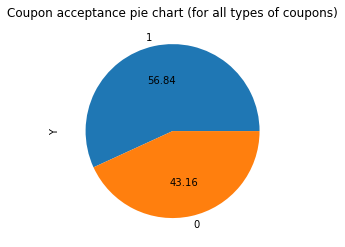

In [18]:
df['Y'].value_counts().plot(kind = 'pie', autopct='%.2f')
plt.title("Coupon acceptance pie chart (for all types of coupons)", size=12)

**Observation**

- 56.84% of all coupons were accepted.

5. Use a bar plot to visualize the `coupon` column.

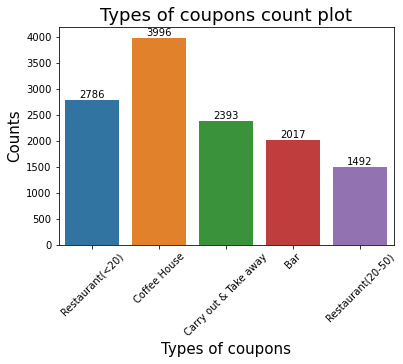

In [19]:
ax = sns.countplot(x='coupon', data=df)
plt.xlabel("Types of coupons", size=15)
plt.ylabel("Counts", size=15)
plt.xticks(rotation=45)
plt.title("Types of coupons count plot", size=18)

# Annotate counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

6. Use a histogram to visualize the temperature column.

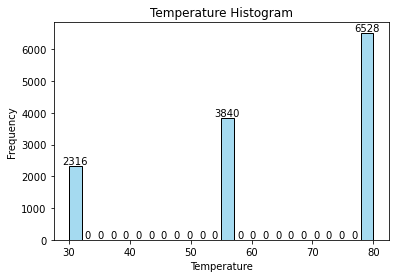

In [20]:
# Create histogram
ax = sns.histplot(df['temperature'], kde=False, color='skyblue')
plt.title('Temperature Histogram')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# let us annotate frequency counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

**Observation:** Coffee House coupon has the highest counts

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [21]:
df_bar = df[df['coupon'] == 'Bar'] 
#let us look at a sample
df_bar.sample(3)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y
3345,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Unmarried partner,1,Bachelors degree,Business & Financial,$62500 - $74999,0,0,4~8,1~3,0,0,0,1,0
7538,No Urgent Place,Partner,Sunny,30,10AM,Bar,1d,Female,36,Single,1,Some college - no degree,Healthcare Practitioners & Technical,$12500 - $24999,0,0,gt8,4~8,0,1,0,0,0
6841,Work,Alone,Sunny,30,7AM,Bar,1d,Male,26,Married partner,1,Bachelors degree,Management,$50000 - $62499,0,0,0,1~3,0,0,0,0,0


2. What proportion of bar coupons were accepted?


In [22]:
df_bar['Y'].value_counts()

0    1190
1     827
Name: Y, dtype: int64

Text(0.5, 1.0, 'Bar coupon acceptance pie chart')

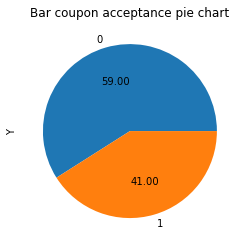

In [23]:
#Now let us visualize this
df_bar['Y'].value_counts().plot(kind = 'pie', autopct='%.2f')
plt.title("Bar coupon acceptance pie chart", size=12)

**Observation:**
- 827 Bar coupons were accepted out of the total of 2,107 Bar coupons issued
- This comes to 41 % acceptance rate

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [24]:
# Create a queary that identifies folks who went to bars 3 times or fewer and then run the acceptance counts:
df_bar.query("Bar == '0' | Bar == '1~3'")['Y'].value_counts()

0    1144
1     674
Name: Y, dtype: int64

In [25]:
# Create a queary and run acceptance counts for the rest of the folks (who went to bar 4 times more more)
df_bar.query("Bar == '4~8' | Bar == 'gt8'")['Y'].value_counts()

1    153
0     46
Name: Y, dtype: int64

Text(0.5, 1.0, 'Bar coupon acceptance for folks who wen to bar 3 times or less')

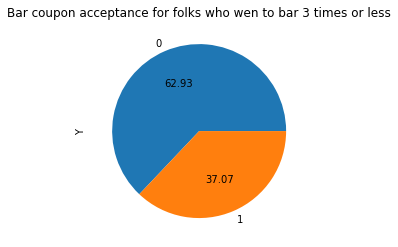

In [26]:
# Now let us visualize this
df_bar.query("Bar == '0' | Bar == '1~3'")['Y'].value_counts().plot(kind = 'pie', autopct='%.2f')
plt.title("Bar coupon acceptance for folks who wen to bar 3 times or less", size=12)

Text(0.5, 1.0, 'Bar coupon acceptance for folks who wen to bar 4 times or more')

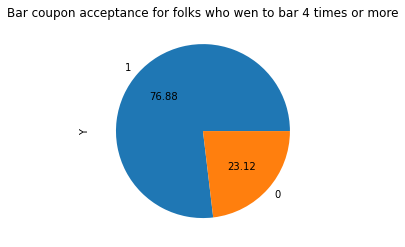

In [27]:
df_bar.query("Bar == '4~8' | Bar == 'gt8'")['Y'].value_counts().plot(kind = 'pie', autopct='%.2f')
plt.title("Bar coupon acceptance for folks who wen to bar 4 times or more", size=12)

**Observation**:

    - People who went to bar more often in the past (4 or more times) are more likely to accept the bar coupon (77% of the time) than the people who wen to the bar 3 times or less (37% time). This is not surprising. 

Let us now do a more comprehensive analysis that look at all values of the frequency of bar visits (not just 3 times or less vs. everyone else)

In [28]:
def splot(x):
    column_name = x.name
    tab1 = pd.crosstab(x, df['Y'], margins=True, normalize='index')
    print(tab1)
    print('-' * 100)
    tab = pd.crosstab(x, df['Y'], normalize='index')
    tab.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.xlabel(column_name)
    plt.ylabel('Proportion of accepted coupons')
    plt.title(f'Crosstab plot: coupon acceptance by values of the {column_name} variable')
    plt.show()

Y           0         1
Bar                    
0    0.706545  0.293455
1~3  0.352645  0.647355
4~8  0.220000  0.780000
gt8  0.265306  0.734694
All  0.589985  0.410015
----------------------------------------------------------------------------------------------------


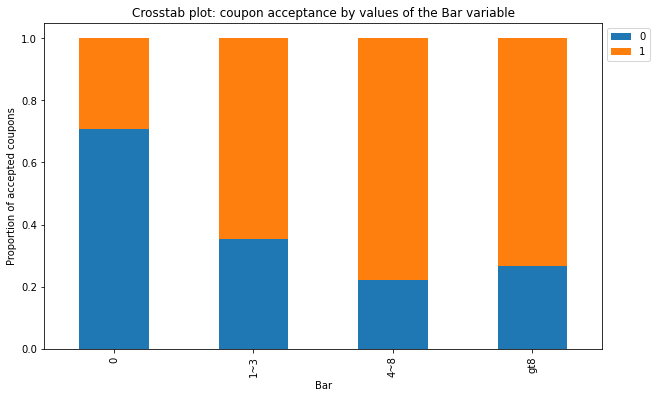

In [29]:
# now let us apply the function to the Bar field
splot(df_bar['Bar'])

**Observation:**
- Not surprisingly, folks who went to the bar more often in the past are more likely to accept the bar coupons
- Folks who never went to the bar are the least likely to accept the bar coupon

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [30]:
'''
First, let us create two separate data frames based on age (25 or older vs less than 25) 
as pertaining to the bar acceptance coupon.

Note: the possible values of the age look like this: 
['21', '26', '31', '36', '41', '46', '50plus', 'below21']

So, "age" is actually a categorical variable (not numerical). 

First, let us create two lists for age and then separate the dataframe by age.

'''
young = ['21', 'below21']
old = ['26', '31', '36', '41', '46', '50plus']

df_bar_young = df_bar[df_bar['age'].isin(young)]
df_bar_old = df_bar[df_bar['age'].isin(old)]

Text(0.5, 1.0, 'Bar coupon acceptance for folks who are under 25')

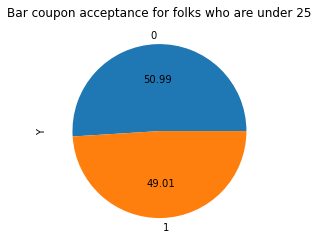

In [31]:
#Now let us look at the acceptace of the bar coupon for folks who are over 25
df_bar_young['Y'].value_counts().plot(kind = 'pie', autopct='%.2f')
plt.title("Bar coupon acceptance for folks who are under 25", size=12)

Text(0.5, 1.0, 'Bar coupon acceptance for folks who are 25 and older')

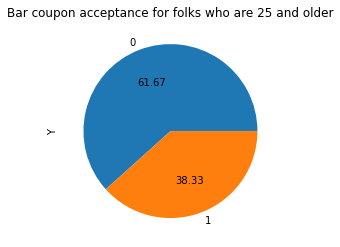

In [32]:
#Now we do the same for the folks who are over 25
df_bar_old['Y'].value_counts().plot(kind = 'pie', autopct='%.2f')
plt.title("Bar coupon acceptance for folks who are 25 and older", size=12)

**Observation:**
- folks who are younger than 25 are more likely to accept the Bar coupons that the folks who are 25 and older

Y               0         1
age                        
21       0.494005  0.505995
26       0.511392  0.488608
31       0.631268  0.368732
36       0.698565  0.301435
41       0.567416  0.432584
46       0.651376  0.348624
50plus   0.703180  0.296820
below21  0.586207  0.413793
All      0.589985  0.410015
----------------------------------------------------------------------------------------------------


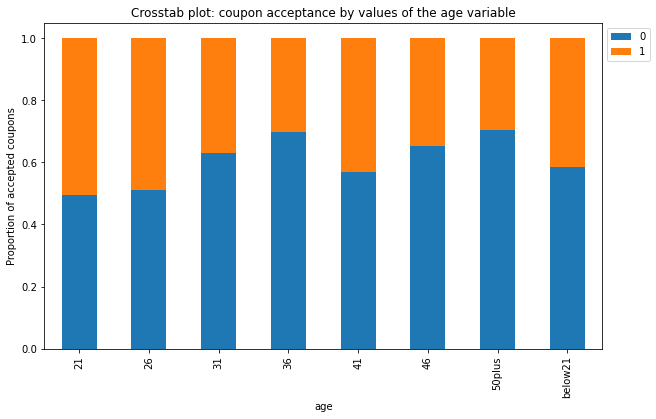

In [33]:
# Now let us do a more detailed analysis of the above (for all age groups):
# We will apply our Stacked Plot function to the Age column of the "Bar" dataframe that we created abovbe
splot(df_bar['age'])

**Observation**
- younger people are generally more likeley to accept the bar coupons. 
- however, 41-year-olds also have a fairly high acceptance rate (43%)
- people in their 30s and 50s+ are less likely to accept the bar coupon

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


**Answer:**
- The Assignment 5 (suggested by the prompt) makes no sense. In order to compare something to something, one needs to have at least two entities (or two groups)
  - For example, one can say "compare the average weight of wolves to the average weight of bears". But you cannot say "compare the average weight of wolves"

- The above assignment gives only one group (people who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry)
- Thus, we do not know what we should compare the above group to. 
- As a result, we cannot do the comparison. 


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [34]:
#This is better. At least we have tree groups. Thus we can compare the three groups to one-aother in terms of their acceptance rate. 
#First, let us filter our dataframce to each of the groups;

#First, let us make the lists:

#These are the lists that define Group1
#Bar
go_to_bar = ['1~3', '4~8', 'gt8']
#passanger
pass_no_tkids = ['Alone', 'Friend(s)', 'Partner']
#maritalStatus
not_widowed = ['Divorced', 'Married partner', 'Single', 'Unmarried partner']

#These are the lists that define Group2:
#Bar
go_to_bar = ['1~3', '4~8', 'gt8']
#age
under_30 = ['21', '26', 'below21']

#These are the lists that define group 3:
#RestaurantLessThan20
cheap_restaurant = ['4~8', 'gt8']
#income:
less_50 = ['$12500 - $24999', '$25000 - $37499', '$37500 - $49999', 'Less than $12500']

In [35]:
#Now let us filtre the Dataframes to these groups by applying the above lists:
group1 = df_bar[df_bar['Bar'].isin(go_to_bar) & df_bar['passanger'].isin(pass_no_tkids) & df_bar['maritalStatus'].isin(not_widowed)]
group2 = df_bar[df_bar['Bar'].isin(go_to_bar) & df_bar['age'].isin(under_30)]
group3 = df_bar[df_bar['RestaurantLessThan20'].isin(cheap_restaurant) & df_bar['income'].isin(less_50)]

Text(0.5, 1.0, 'Bar coupon acceptance for Group1')

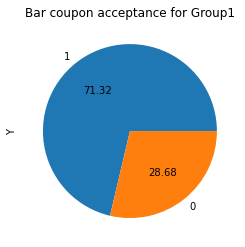

In [36]:
#Next we compare the Bar Coupon acceptance rate (Y) among the thee Groups:
group1['Y'].value_counts().plot(kind = 'pie', autopct='%.2f')
plt.title("Bar coupon acceptance for Group1", size=12)

Text(0.5, 1.0, 'Bar coupon acceptance for Group2')

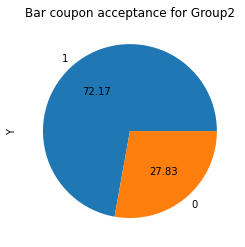

In [37]:
#Next we chart the acceptance rate for Group2
group2['Y'].value_counts().plot(kind = 'pie', autopct='%.2f')
plt.title("Bar coupon acceptance for Group2", size=12)

Text(0.5, 1.0, 'Bar coupon acceptance for Group3')

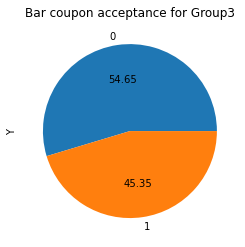

In [38]:
#Next we chart the acceptance rate for Group 3
group3['Y'].value_counts().plot(kind = 'pie', autopct='%.2f')
plt.title("Bar coupon acceptance for Group3", size=12)

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

**Answer**:

    - Groups 1 and 2 had very similar (high) acceptance rate of 71% and 72% respectively
    - Group 3 had much lower acceptance rate of only 45%
    - Based on the strange (somewhat arbitrary) selection of several variables and values for the groups, we cannot make any strong hypothesis.
       - This would be analogous to giving a patient 3 different drugs and then asking to explain which of the 3 drugs helped the patient recover.
       - The only thing in common between Groups 1 and 2 was the fact that they went to bars more than 1 times per month. As we saw earlier, going to bars often increases the chance of accepting bar coupon
       - However, other variables also impact Groups 1 and 2. 
       

## Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

### A general comment about my approach for the Independent Investigation

In my opinion, the "bar coupon example" analysis shown in the above prompt is not very practical or useful because:

1) At first, the analysis looks at the impact of a few individual variables on the desired outcome (coupon acceptance)
   - The problem with this is that only a small portion of individual variables is examined.

2) Then the analysis seems to look at a handful of seemingly arbitrary selected combinations of values of some the variables (for example, "people who go to bars more than once a month, had passengers that were not a kid, and were not widowed").
   - The problem with this is that the number of such combinations is vast. After the data cleanup, we have a total of 22 useful variables. Some of them have 2 values, some have up to 25 values. As I show in the next code cell below, the total number of combinations of unique values comes to 19 trillion (19,110,297,600,000). So comparing a few dozens (or even thousands) of the 58 trillion combinations will result in negligible coverage.
                                                    

In [39]:
# Calculate product of unique values count in each column
combinations = np.prod([df[column].nunique() for column in df.columns])

print("The total number of combination of unique values in our dataframe:", combinations )

The total number of combination of unique values in our dataframe: 19110297600000


**Therefore, I'd like to propose the following approach:**

a) **In the Visualization / EDA portion of the analysis, I will do a uni-variate (one variable at a time) analysis of the impact of each value on the desired outcome** (coupon acceptance). This will help us understand which variables (on their own) have impact and which variables have no impact. In my experience, if a variable has no impact on its own, then it is rather unlikely (though possible) to have impact even in a combination with other variables. 
   - For example, if a patient's zodiac sign has no impact on Covid-19 mortality rate, then the zodiac sign will likely be not particularly useful in combination with other variables, such as the Body-Mass Index (BMI). 
   - On the other hand, if patient's age has an impact on Covid-19 mortality rate, then it is likely be useful in combination with other variables (such as the BMI). 
 
Such analysis will be more practical, since it will be limited to 23 variables (no combinations at this point).

As suggested by the assignment, I will look at the "Coffee House" coupons as an example. But the same analysis can be replicated for all other types of coupons.

b) **In the statistical analysis portion below, I will do a pair-wise association analysis using a Cramer's V matrix.** Similar to correlation matrix, it will compare the association of any two variables.
   - One of these variables happens to be the desire outcome (column "Y"), so we will also see each of the variable's impact on the desire outcome. 
   - We can repeat the Cramer's V matrix analysis for each types of coupons (not just Coffee House coupons). 

In [40]:
# Let us look at the Coffee House coupon acceptance by each ov the variable.
# First, let us define the Coffee Shop Coupon Dataframe:
df_coffee = df[df['coupon'] == 'Coffee House'] 

### Impact of Destination values on Coffee House Coupon Acceptance

Y                       0         1
destination                        
Home             0.637931  0.362069
No Urgent Place  0.419026  0.580974
Work             0.554217  0.445783
All              0.500751  0.499249
----------------------------------------------------------------------------------------------------


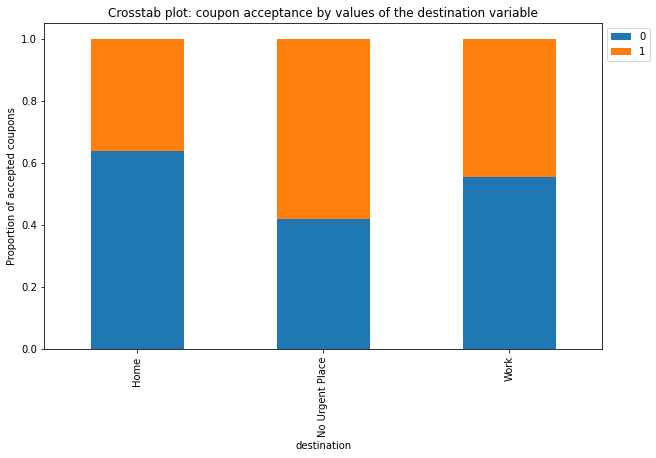

In [41]:
#Now let us do the crosstabulation analysis for Destination:
splot(df_coffee['destination'])

**Observation**
- "No urgent place" destination had the highest Coffee House coupon acceptance (58%)
- "Home had the lowest (36%)

### Impact of Passenger values on Coffee House Coupon Acceptance

Y                 0         1
passanger                    
Alone      0.562057  0.437943
Friend(s)  0.403094  0.596906
Kid(s)     0.516908  0.483092
Partner    0.429508  0.570492
All        0.500751  0.499249
----------------------------------------------------------------------------------------------------


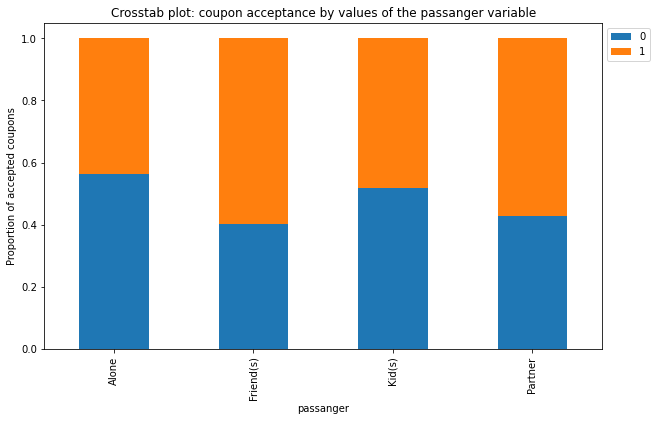

In [42]:
splot(df_coffee['passanger'])

**Observation**:

- "Friend and "Partner" passengers had the highest Coffee House coupon acceptance at 60% and 57% respectively

### Impact of Weather values on Coffee House Coupon Acceptance

Y               0         1
weather                    
Rainy    0.477876  0.522124
Snowy    0.567657  0.432343
Sunny    0.496395  0.503605
All      0.500751  0.499249
----------------------------------------------------------------------------------------------------


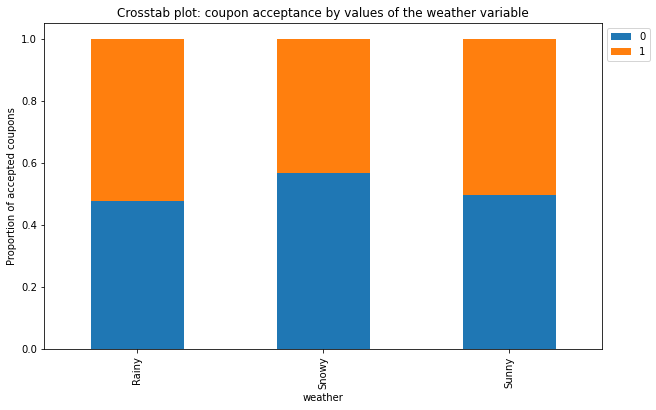

In [43]:
splot(df_coffee['weather'])

**Observation**:

- Coffee House coupon acceptance was the lowest (43%) during Snowy weather, which is not surprising, because driving in the snow is risky and slow.
- Rainy weather was the best (52% acceptance). In is known that people who live in rainy climates (ex.g., Seattle, consume more coffee).

### Impact of Temperature values on Coffee House Coupon Acceptance

Y                   0         1
temperature                    
30           0.556604  0.443396
55           0.544244  0.455756
80           0.470221  0.529779
All          0.500751  0.499249
----------------------------------------------------------------------------------------------------


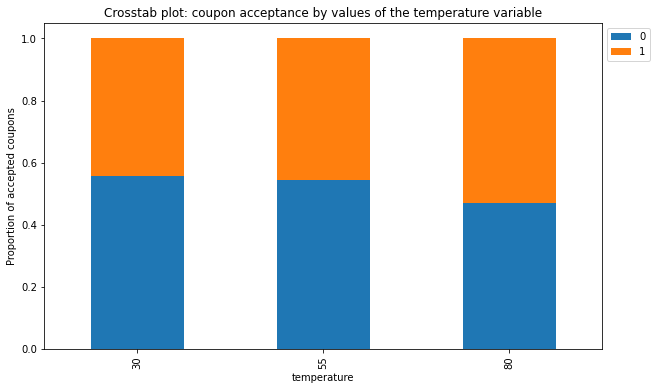

In [44]:
splot(df_coffee['temperature'])

**Observation**:

- Warm weather (80F) had the highest acceptance rate (53%)

### Impact of Time of Day values on Coffee House Coupon Acceptance

Y            0         1
time                    
10AM  0.359288  0.640712
10PM  0.575758  0.424242
2PM   0.452141  0.547859
6PM   0.587374  0.412626
7AM   0.554217  0.445783
All   0.500751  0.499249
----------------------------------------------------------------------------------------------------


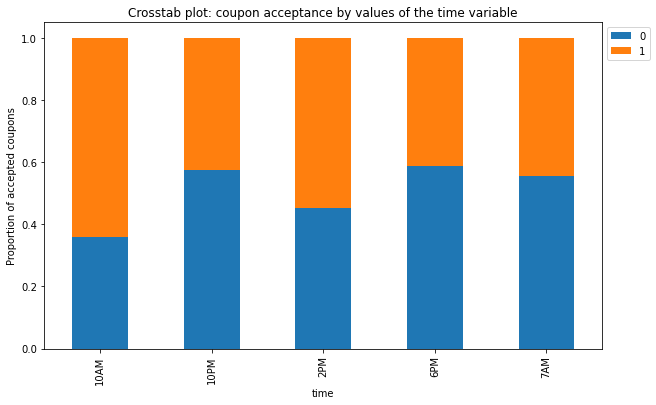

In [45]:
splot(df_coffee['time'])

**Observation:**
- Late morning (10 am) time had the highest acceptance of Coffee Shop coupons (64%).
- 2 pm was the 2nd highest (54%). This is when people often feel sleepy and need another coffee.

### Impact of the Expiration values on Coffee House Coupon Acceptance

Y                  0         1
expiration                    
1d          0.416054  0.583946
2h          0.568029  0.431971
All         0.500751  0.499249
----------------------------------------------------------------------------------------------------


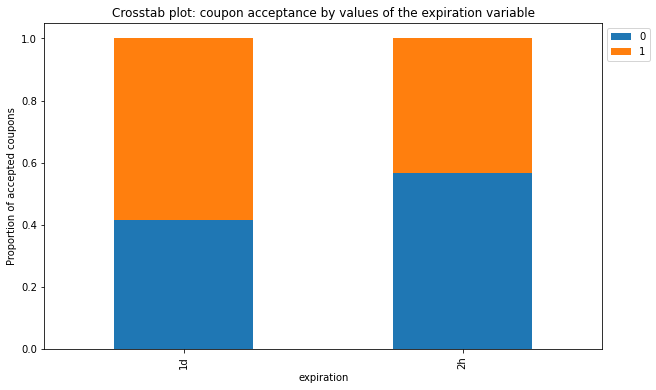

In [46]:
splot(df_coffee['expiration'])

**Observation:**
- Coupons that were set to expire in one day had greater acceptance rate (58%) than the coupons that were set to expire in two hours (43%).
  - Perhaps the users who received the coupon found the former more valuable.

### Impact of Gender values on Coffee House Coupon Acceptance

Y              0         1
gender                    
Female  0.507557  0.492443
Male    0.493573  0.506427
All     0.500751  0.499249
----------------------------------------------------------------------------------------------------


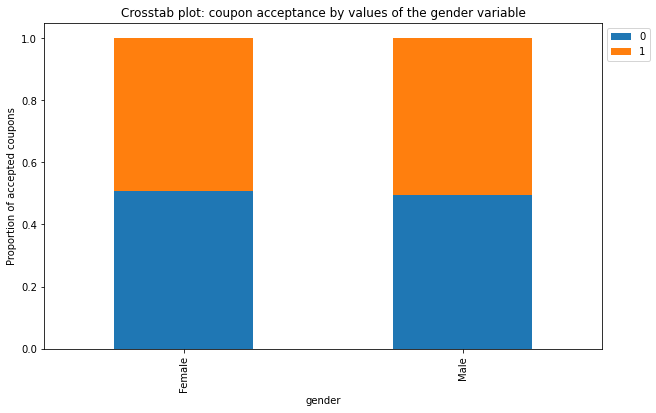

In [47]:
splot(df_coffee['gender'])

**Observation:**

- Gender has no impact. The difference in acceptance rate is negligible.

### Impact of Age values on Coffee House Coupon Acceptance

Y               0         1
age                        
21       0.475651  0.524349
26       0.485172  0.514828
31       0.523274  0.476726
36       0.532338  0.467662
41       0.498462  0.501538
46       0.486364  0.513636
50plus   0.579817  0.420183
below21  0.303226  0.696774
All      0.500751  0.499249
----------------------------------------------------------------------------------------------------


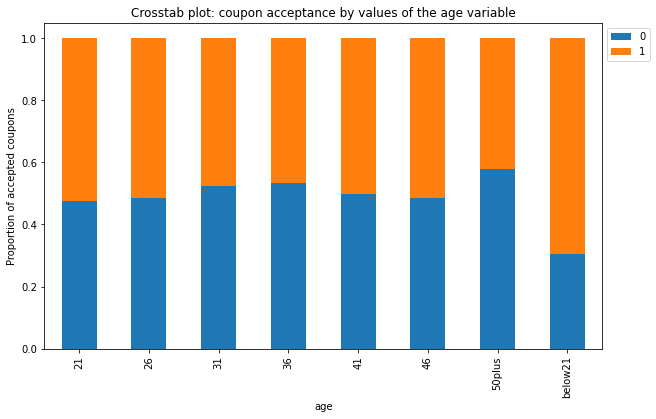

In [48]:
splot(df_coffee['age'])

**Observation:**

- Younger folks had better Coffee House Coupon acceptance rate. 
  - Folks under 21 years of age had it as high as 52%
- Folks over 50 had the lowest acceptance rate (42%)

### Impact of Marital Status values on Coffee House Coupon Acceptance

Y                         0         1
maritalStatus                        
Divorced           0.476821  0.523179
Married partner    0.506814  0.493186
Single             0.483871  0.516129
Unmarried partner  0.521618  0.478382
Widowed            0.648649  0.351351
All                0.500751  0.499249
----------------------------------------------------------------------------------------------------


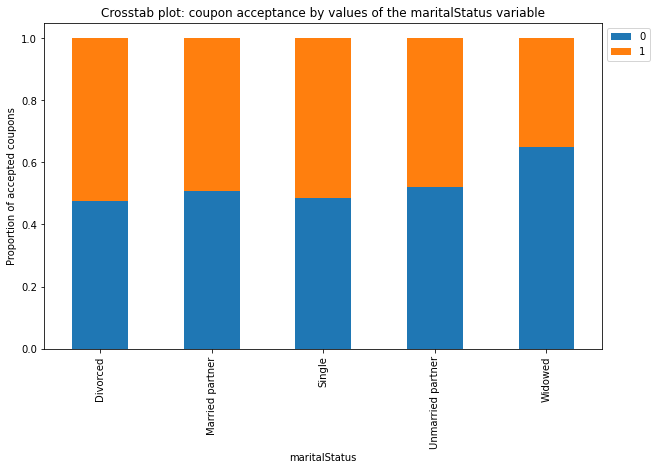

In [49]:
splot(df_coffee['maritalStatus'])

**Observation**

- Divorced and single people had the highest acceptance rate (52% and 51.6% respectively)
- Widowed people had the lowest rate (35%)

### Impact of Having Children on Coffee House Coupon Acceptance

Y                    0         1
has_children                    
0             0.493868  0.506132
1             0.511613  0.488387
All           0.500751  0.499249
----------------------------------------------------------------------------------------------------


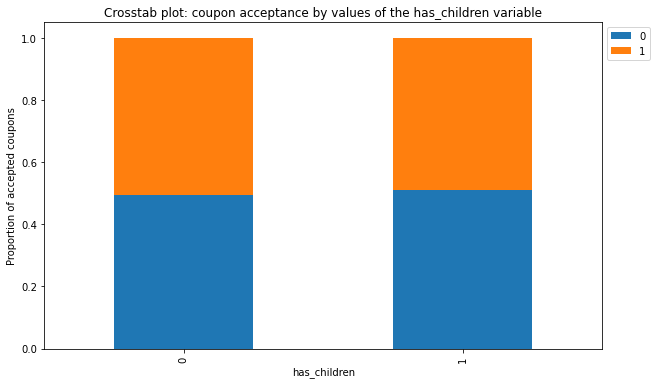

In [50]:
splot(df_coffee['has_children'])

**Observation**

- The impact of having children was negligible about 1.1% difference

### Impact of Education on Coffee House Coupon Acceptance

Y                                              0         1
education                                                 
Associates degree                       0.482857  0.517143
Bachelors degree                        0.537226  0.462774
Graduate degree (Masters or Doctorate)  0.489967  0.510033
High School Graduate                    0.458781  0.541219
Some High School                        0.392857  0.607143
Some college - no degree                0.484318  0.515682
All                                     0.500751  0.499249
----------------------------------------------------------------------------------------------------


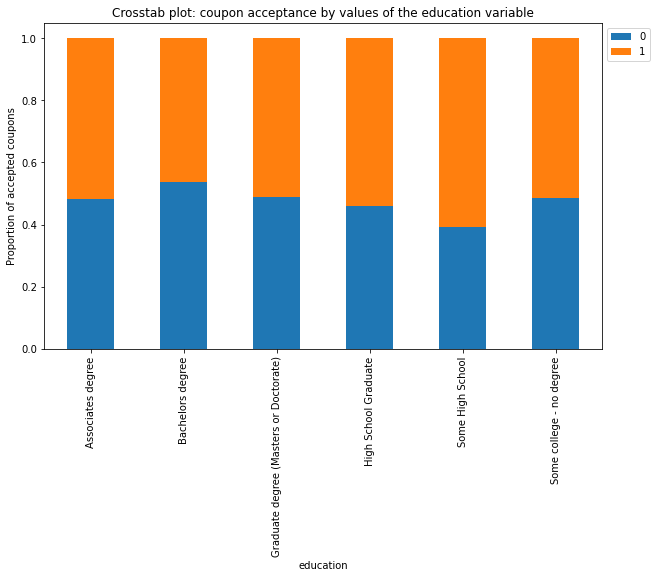

In [51]:
splot(df_coffee['education'])

**Observation**

- Less educated people (some high school, high school graduates, and folks with associate degrees) had the highest acceptance rates.

### Impact of Occupation on Coffee House Coupon Acceptance

Y                                                 0         1
occupation                                                   
Architecture & Engineering                 0.444444  0.555556
Arts Design Entertainment Sports & Media   0.492823  0.507177
Building & Grounds Cleaning & Maintenance  0.272727  0.727273
Business & Financial                       0.520548  0.479452
Community & Social Services                0.648649  0.351351
Computer & Mathematical                    0.496659  0.503341
Construction & Extraction                  0.521739  0.478261
Education&Training&Library                 0.564189  0.435811
Farming Fishing & Forestry                 0.454545  0.545455
Food Preparation & Serving Related         0.554217  0.445783
Healthcare Practitioners & Technical       0.256757  0.743243
Healthcare Support                         0.384615  0.615385
Installation Maintenance & Repair          0.431818  0.568182
Legal                                      0.623188  0.376812
Life Phy

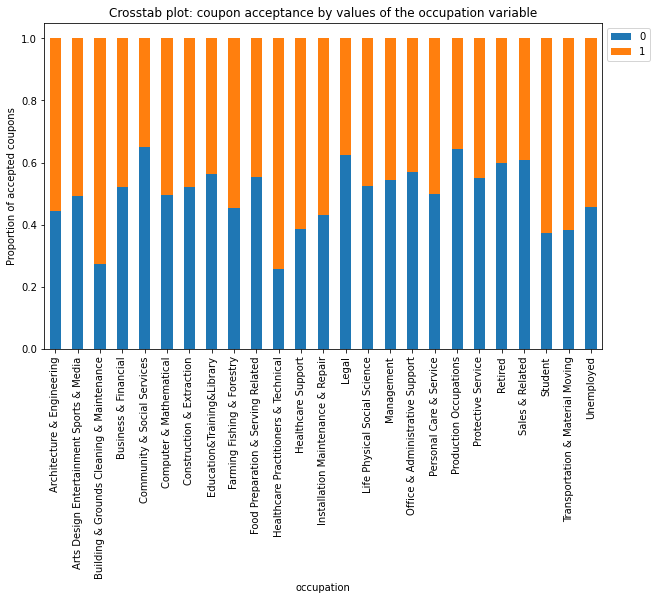

In [52]:
splot(df_coffee['occupation'])

**Observations**

- Healthcare practitioners had the highest acceptance rate for Coffee House coupons (74%). 
   - This is not surprising. Often, healthcare professionals, especially medical residents, are overworked and are in strong need of coffee to stay alert.
- Building & Ground Cleaning & Maintenance group was the 2nd highest (73%)
- Community and Social workers had the lowest acceptance rates (35%)

### Impact of Income on Coffee House Coupon Acceptance

Y                        0         1
income                              
$100000 or More   0.505618  0.494382
$12500 - $24999   0.459596  0.540404
$25000 - $37499   0.526563  0.473438
$37500 - $49999   0.457627  0.542373
$50000 - $62499   0.496350  0.503650
$62500 - $74999   0.563636  0.436364
$75000 - $87499   0.703390  0.296610
$87500 - $99999   0.442804  0.557196
Less than $12500  0.448052  0.551948
All               0.500751  0.499249
----------------------------------------------------------------------------------------------------


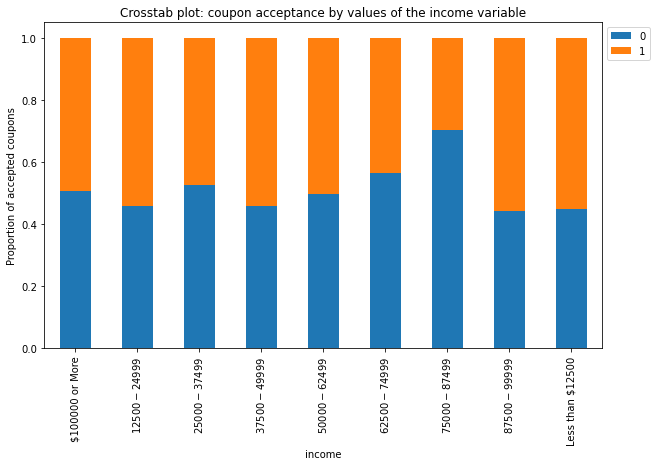

In [53]:
splot(df_coffee['income'])

**Observation**

- The acceptance rate by income data is a bit odd:
    - the lowest bracket and one of the highest brackets had high acceptance rates (55% and 56% respectively)
    - but the 2nd highest bracket ($75-$87k) had the lowest acceptance rate (30%)

### Impact of Bar visits on Coffee House Coupon Acceptance

Y           0         1
Bar                    
0    0.501999  0.498001
1~3  0.501312  0.498688
4~8  0.475676  0.524324
gt8  0.548673  0.451327
All  0.500751  0.499249
----------------------------------------------------------------------------------------------------


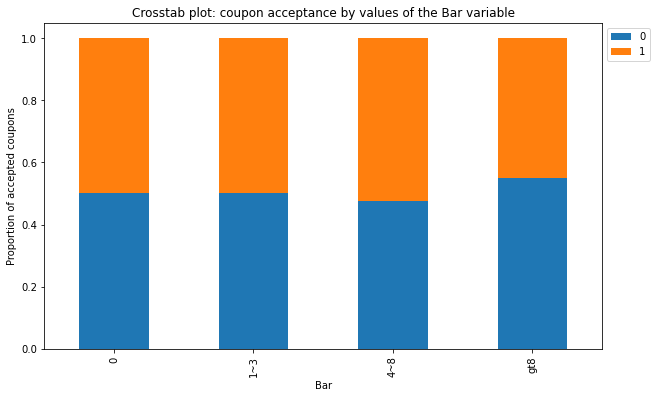

In [54]:
splot(df_coffee['Bar'])

**Observation:**

- Bar visits have little impact on the Coffee House Coupon acceptance. The differences are pretty minor.

### Impact of Coffee House visits on Coffee House Coupon Acceptance

Y                   0         1
CoffeeHouse                    
0            0.649952  0.350048
1~3          0.352207  0.647793
4~8          0.314126  0.685874
gt8          0.342105  0.657895
All          0.500751  0.499249
----------------------------------------------------------------------------------------------------


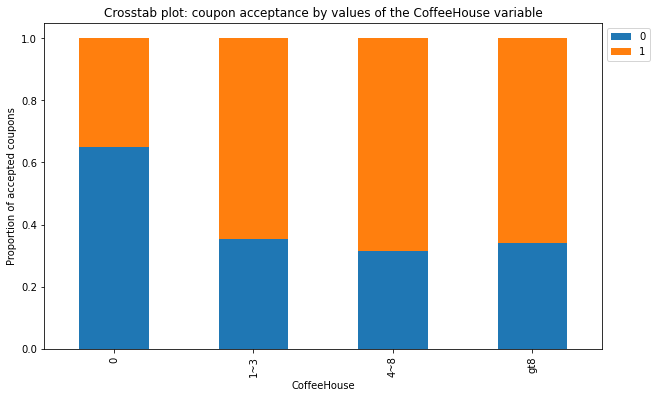

In [55]:
splot(df_coffee['CoffeeHouse'])

**Observation:**
- As one would expect, prior Coffee House visits have a massive influence on the Coffee House coupon acceptance. 
  - whereas folks who never visited Coffee House, accepted the coupons only 19% of the time, folks who visited a lot (4+ times) accepted the coupon 66-69% of the time.
  - this will likely be the greatest predictor of the Coffee House coupon acceptance. The same is likely true for other types of coupons (but needs to be verified).

### Impact of CarryAway variable on Coffee House Coupon Acceptance

Y                 0         1
CarryAway                    
0          0.573744  0.426256
1~3        0.483580  0.516420
4~8        0.489187  0.510813
gt8        0.494845  0.505155
All        0.500751  0.499249
----------------------------------------------------------------------------------------------------


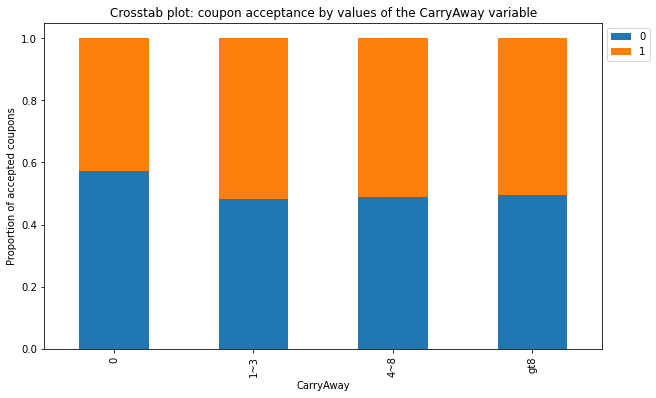

In [56]:
splot(df_coffee['CarryAway'])

**Observation:**
 
- There might be a small dependency here. People who never did Carry Away, are less likely to accept the Coffee House coupons

### Impact of RestaurantLessThan20 variable on Coffee House Coupon Acceptance

Y                            0         1
RestaurantLessThan20                    
0                     0.552068  0.447932
1~3                   0.495084  0.504916
4~8                   0.486344  0.513656
gt8                   0.477958  0.522042
All                   0.500751  0.499249
----------------------------------------------------------------------------------------------------


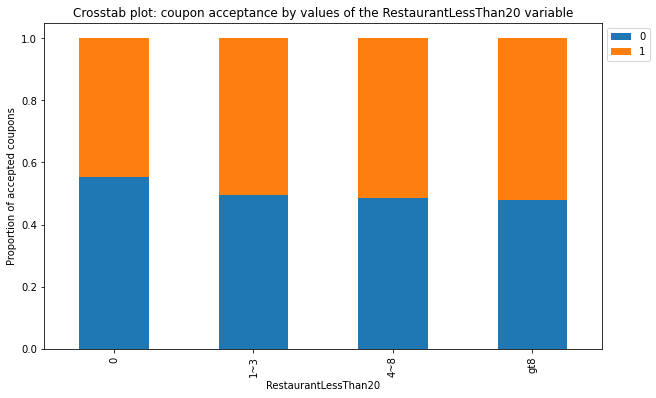

In [57]:
splot(df_coffee['RestaurantLessThan20'])

**Observation:**

- There is a small dependency here. People who never went to a cheap restaurant coupon are less likely to accept the Coffee House coupon.

### Impact of Restaurant20To50 variable on Coffee House Coupon Acceptance

Y                        0         1
Restaurant20To50                    
0                 0.517763  0.482237
1~3               0.483568  0.516432
4~8               0.427835  0.572165
gt8               0.362637  0.637363
All               0.500751  0.499249
----------------------------------------------------------------------------------------------------


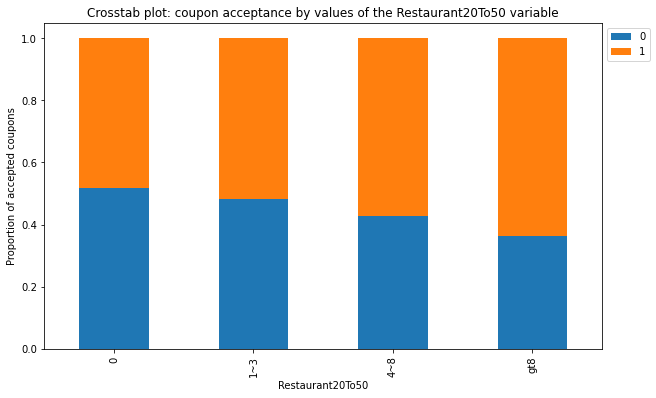

In [58]:
splot(df_coffee['Restaurant20To50'])

**Observation:**

- The Restaurant 20 to 50 variable has impact. The more people go to these restaurants, the higher the likelihood of them accepting the Coffee House coupon.

### Impact of toCoupon_GEQ15min variable on Coffee House Coupon Acceptance

Y                         0         1
toCoupon_GEQ15min                    
0                  0.451898  0.548102
1                  0.546068  0.453932
All                0.500751  0.499249
----------------------------------------------------------------------------------------------------


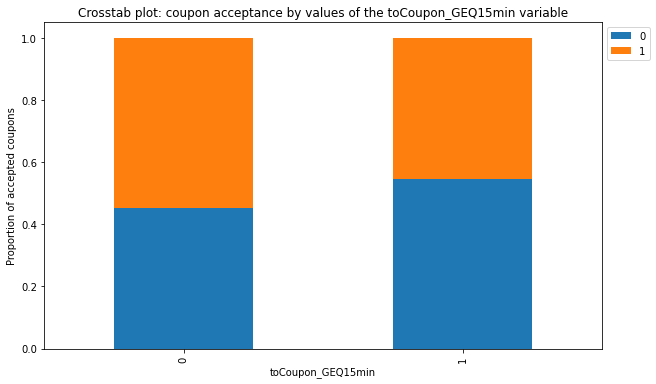

In [59]:
splot(df_coffee['toCoupon_GEQ15min'])

**Observation**

- There appears to be a negative relationship here. toCoupon_GEQ15min = 1 is associated with lower CoffeeHouse coupon acceptance rates.

### Impact of toCoupon_GEQ25min variable on Coffee House Coupon Acceptance

Y                         0         1
toCoupon_GEQ25min                    
0                  0.487792  0.512208
1                  0.654839  0.345161
All                0.500751  0.499249
----------------------------------------------------------------------------------------------------


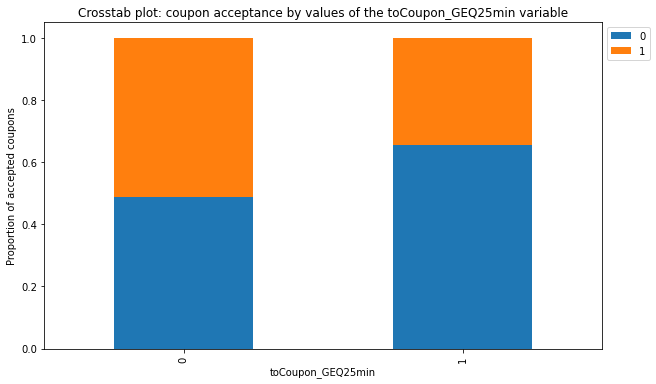

In [60]:
splot(df_coffee['toCoupon_GEQ25min'])

**Observation**

- There appears to be an even strogner negative relationship here. toCoupon_GEQ25min = 1 is associated with significantly lower CoffeeHouse coupon acceptance rates.

### Impact of direction_same variable on Coffee House Coupon Acceptance

Y                      0         1
direction_same                    
0               0.508010  0.491990
1               0.469333  0.530667
All             0.500751  0.499249
----------------------------------------------------------------------------------------------------


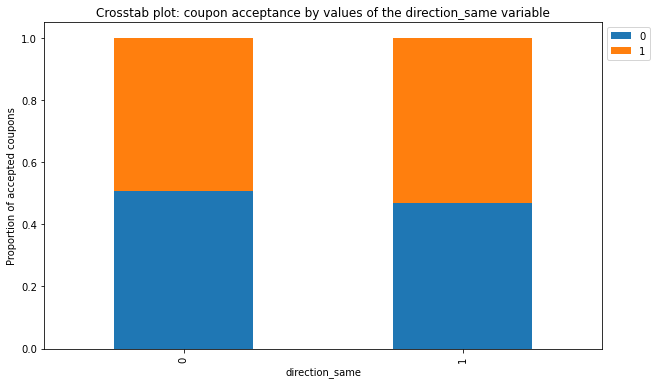

In [61]:
splot(df_coffee['direction_same'])

**Observation**

- There might be a slight positive relationship here. direction_same = 1 is associated with somewhat higher CoffeeHouse coupon acceptance rates, which is to be expected.

# Part 5: Statistical Analysis

## Measuring association between the categorical variables using Cramer's V

When we look at the values of our dataframe, we will notice that all variables except for one (weather) are actually categorical variables. 

For example "age" variable might seem numeric, but upon closer look, we see the following possible values for "age":

- '21', '26', '31', '36', '41', '46', '50plus', 'below21'

'50plus' and 'below21' cannot be converted to a number, since we do not know what the median (or mean) age for people in those buckets would be
Even the rest of the values seem like 5-year-increment buckets rather than numbers. So, we should treat these values as categories and not numbers.
   
"Temperature" is the only variable that contains only numbers, but the list of all possible values for "weather" is:
 - 30, 55, 80 (these also seem like bucket IDs)
 
It seems unlikely that the temperature was equal only to one of these three values during the time the data was collected. Most likely, the temperature was sorted into approximate “cold”, “moderate” and “warm” buckets.
 
Since we are dealing with Categorical (and not numerical) variables, we cannot do correlation matrix analysis. In order to measure how each of our categorical features influences the outcome and in order to see how any pair of variables relate to each-other, we will use Cramer's V association measure instead of the correlation. 

The theory is described here: https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V

Cramer's v calculation relies on Chi-Squared statistics, so we will need the SciPy module.

In [62]:
# first, let us import the Stats module from SciPy
# we will use it for Chi-Squared calculatuions, which is the basis of Cramer's V
from scipy import stats

In [63]:
#Now let us a define function for Cramer's V association between pairs of variables in a Crosstab matrix
def cramers_v(x, y):
    conf_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(conf_matrix)[0]
    n = conf_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = conf_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rc = r - ((r - 1) ** 2) / (n - 1)
    kc = k - ((k - 1) ** 2) / (n - 1)
    
    # Check for 0 and negative values for the mimimum, which we will replace with zeros.
    if min((kc - 1), (rc - 1)) <= 0:
        return 0
    else:
        return np.sqrt(phi2corr / min((kc - 1), (rc - 1)))

In [64]:
# Now, let us define the function to draw our matrix by applying the previous function to each cell.
# Like a correlation matrix, Cramer's V matrix will also be a semetrical matrix with 1s (perfect association) on the diagonal
def cramer_v_matrix(df):
    cols = df.columns
    n = len(cols)
    cramer_v = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            if i == j:
                cramer_v[i, j] = 1
            else:
                cramer_v[i, j] = cramers_v(df[cols[i]], df[cols[j]])

    return cramer_v

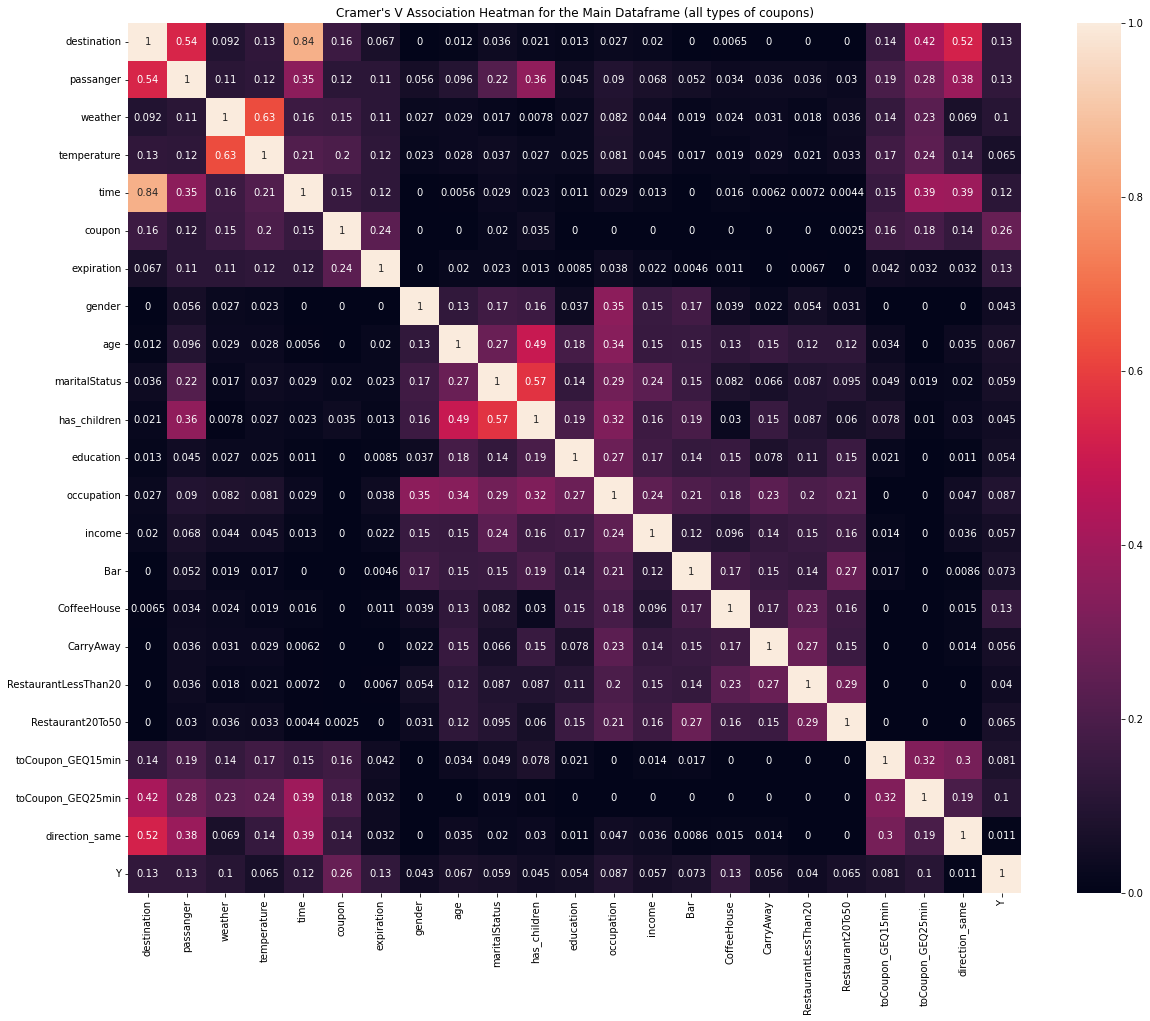

In [65]:
#Now let us apply the function to the main dataframe (containing data on all coupons)
cramer_v = cramer_v_matrix(df)
plt.figure(figsize=(20, 16))
sns.heatmap(cramer_v, annot=True, xticklabels=df.columns, yticklabels=df.columns)
plt.title("Cramer's V Association Heatman for the Main Dataframe (all types of coupons)")
plt.show()


**Observations:**

When it comes to the data on acceptance of all coupons (our main dataframe), the following pairs of variables have the strongest association:
(association of over 0.6 is considered "strong")
- Time and distance: 0.84
- Weather and Temperature (not surprisingly): 0.63

The following pairs of variables have "Decent" association (between 0.4 and 0.6)
- Marital Status and Has kids (not surprisingly, since Married people are expected to have more kids than singles): 0.57
- Passenger and Destination
- Direction Same and Destination
- Direction Opposite and Destination
- Age and has Children (not surprisingly since people who are two young are less likely to have children)
- to Coupon GEQ25 min and Destination

The strongest predictors (association) to accepting any coupons (the Y variable) are the following:
- Coupon
- Destination
- Passenger
- Coffee House

## Bar Coupon variable association analysis

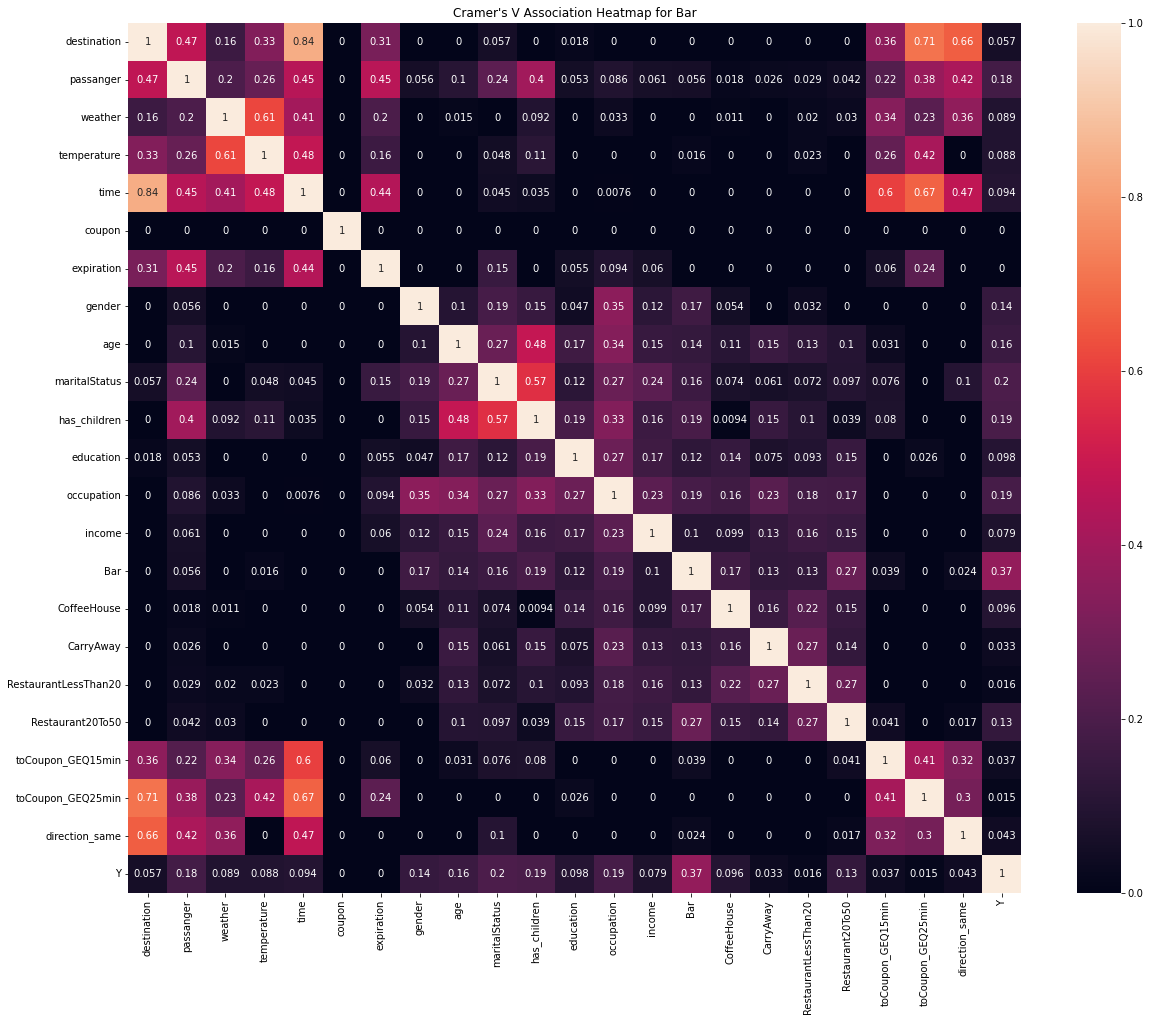

In [66]:
#Now let us apply the Cramer V function to the "Bar" Coupons (using the earlier-defined data frame that filders only for Bar coupons)
cramer_v = cramer_v_matrix(df_bar)
plt.figure(figsize=(20, 16))
sns.heatmap(cramer_v, annot=True, xticklabels=df.columns, yticklabels=df.columns)
plt.title("Cramer's V Association Heatmap for Bar")
plt.show()

**Observations:**

When it comes to the data on acceptance of Bar coupons, the following features have a strong association (over 0.6):
- Time and destination: 0.84
- ToCoupon_GEQ25 min and Destination: 0.71
- Weather and Temperature (not surprisingly): 0.61

The following pairs of variables have "Decent" association (between 0.4 and 0.6)
- Marital Status and Has kids (not surprisingly, since Married people are expected to have more kids than singles): 0.57
- Has Kids and Age
- Time and Temperature
- Time and Passengers

The strongest predictors of the acceptance of the Bar coupon (the Y variable) are:
- Bar (not surprisingly)
- Marital Status
- Has Children
- Occupation
- Passenger
- Age

## 'Carry out & Take away'coupon Association Analysis

In [67]:
# now let us do the same association specific for the 'Carry out & Take away' coupons
# first, let us filter the main dataframe only to those type of coupons
df_carry = df[df['coupon'] == 'Carry out & Take away'] 
#let us look at a sample of the new dataframe
df_carry.sample(3)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y
11199,Home,Alone,Sunny,80,6PM,Carry out & Take away,2h,Male,26,Single,0,Bachelors degree,Student,$12500 - $24999,0,gt8,gt8,gt8,0,1,0,1,1
187,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,26,Single,1,Associates degree,Healthcare Practitioners & Technical,$25000 - $37499,0,1~3,4~8,1~3,0,1,0,0,1
3166,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,50plus,Married partner,1,Some college - no degree,Retired,$87500 - $99999,0,0,1~3,1~3,0,1,0,0,1


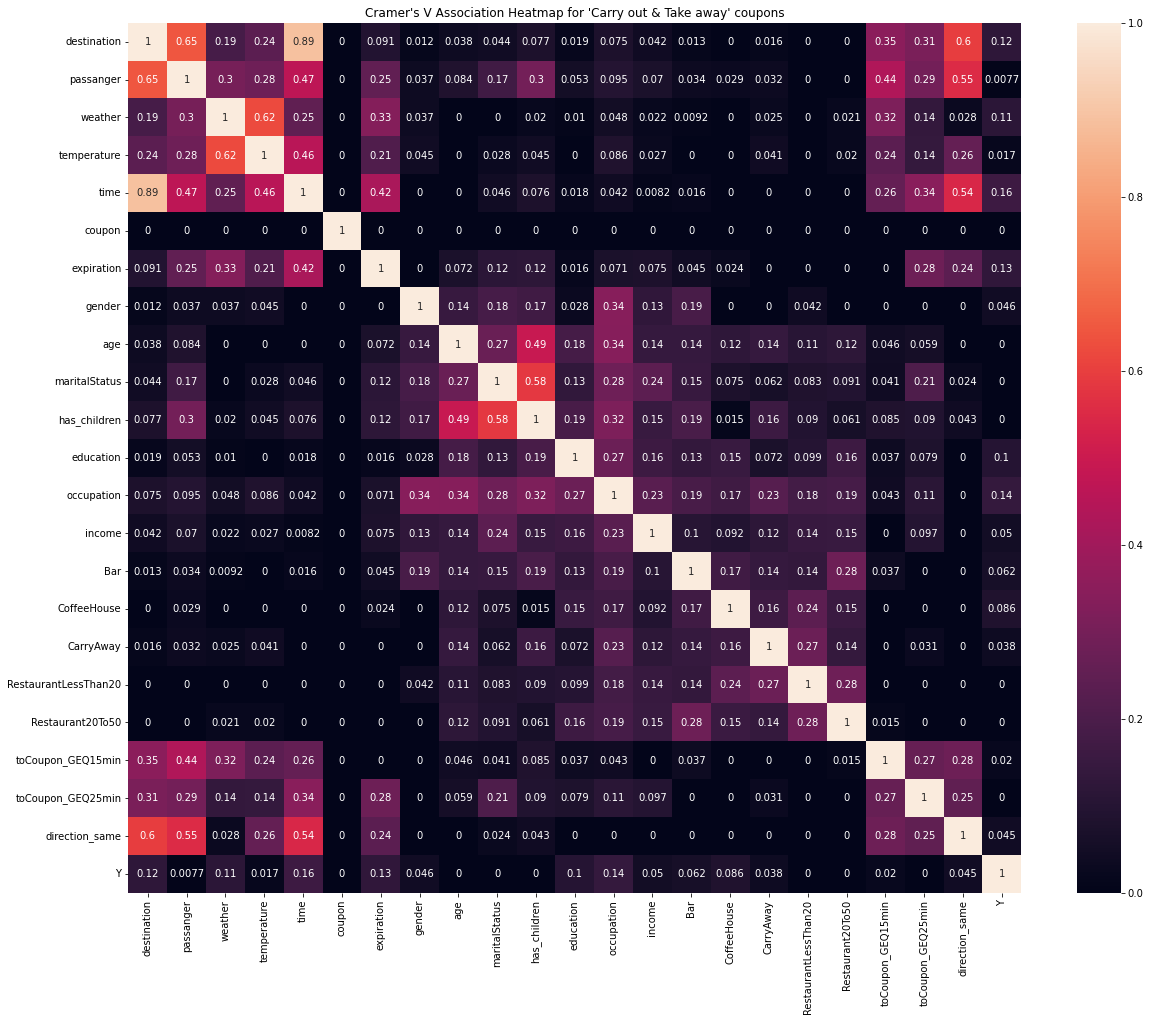

In [68]:
#Now let us apply the Cramer V function to the "Carry out & Take away" Coupons (using the earlier-defined data frame that filders only for Bar coupons)
cramer_v = cramer_v_matrix(df_carry)
plt.figure(figsize=(20, 16))
sns.heatmap(cramer_v, annot=True, xticklabels=df.columns, yticklabels=df.columns)
plt.title("Cramer's V Association Heatmap for 'Carry out & Take away' coupons")
plt.show()

**Observations:**

When it comes to the data on acceptance of Bar coupons, the following features have Strong association (over 0.6):

- Time and destination: 0.89
- Passenger and destination: 0.65
- Weather and Temperature (not surprisingly): 0.62

The following pairs of variables have "Decent" association (between 0.4 and 0.6)

- Marital Status and Has kids (not surprisingly, since Married people are expected to have more kids than singles)
- Has Kids and Age
- Time and Passengers
- Time and Temperature

The strongest predictors of the acceptance of the Bar coupon (the Y variable) are:

- Time
- Occupation
- Expiration
- Destination
- WeatherMarital Status
- Education

# 'Coffee House' Coupon association analysis

In [69]:
# first, let us filter the main dataframe to contain only 'Coffee House' coupons
df_coffee = df[df['coupon'] == 'Coffee House'] 
#let us look at a sample of the new dataframe
df_coffee.sample(3)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y
6218,No Urgent Place,Friend(s),Sunny,55,2PM,Coffee House,1d,Female,41,Married partner,1,Some college - no degree,Arts Design Entertainment Sports & Media,$62500 - $74999,0,0,1~3,1~3,0,0,0,0,1
8609,No Urgent Place,Alone,Sunny,55,6PM,Coffee House,2h,Female,50plus,Married partner,1,Associates degree,Office & Administrative Support,$75000 - $87499,1~3,4~8,1~3,4~8,4~8,0,0,0,0
771,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,26,Single,0,Graduate degree (Masters or Doctorate),Legal,$25000 - $37499,1~3,1~3,1~3,gt8,1~3,1,0,0,1


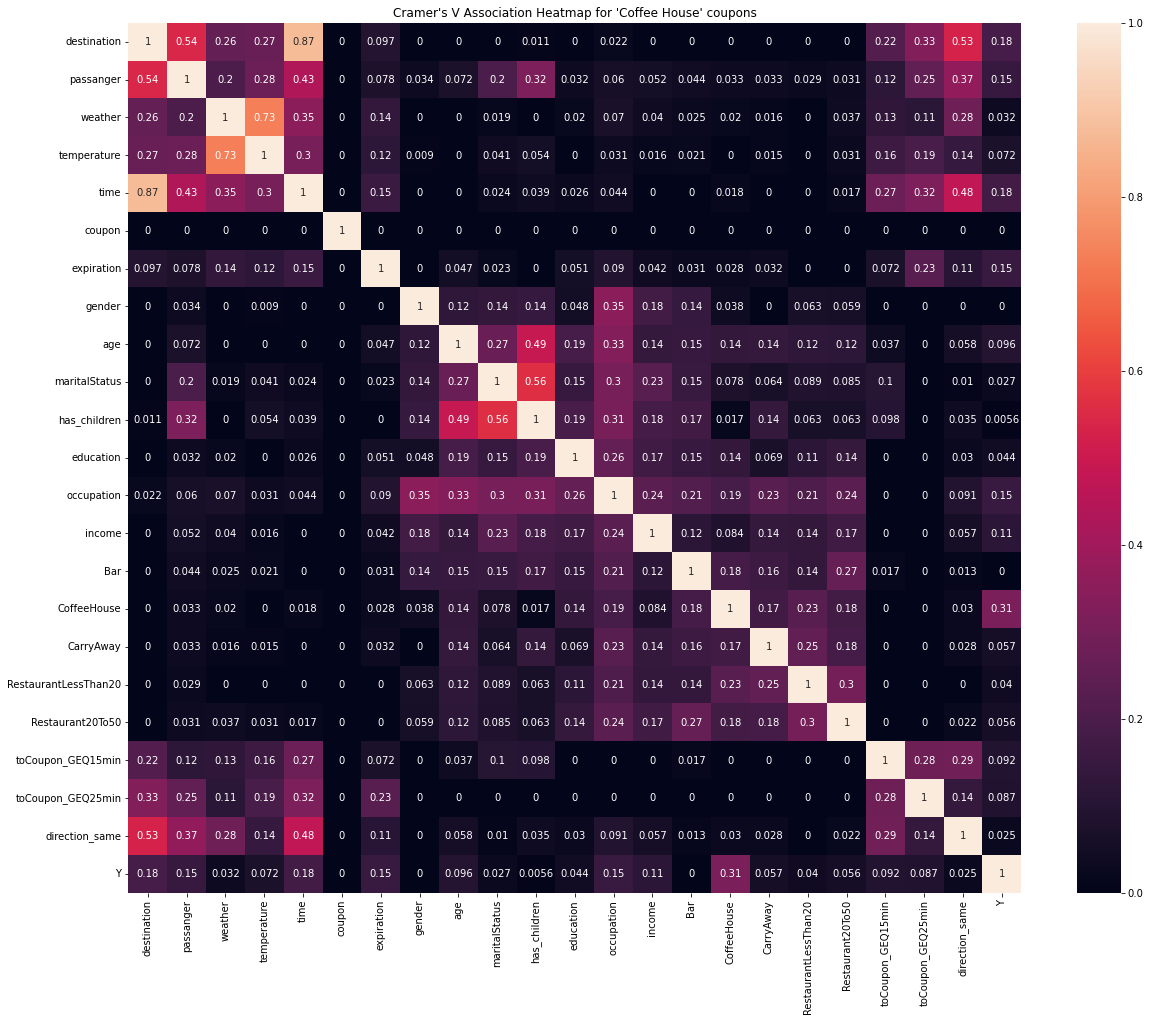

In [70]:
#Now let us apply the Cramer V function to the 'Coffee House' Coupons
cramer_v = cramer_v_matrix(df_coffee)
plt.figure(figsize=(20, 16))
sns.heatmap(cramer_v, annot=True, xticklabels=df.columns, yticklabels=df.columns)
plt.title("Cramer's V Association Heatmap for 'Coffee House' coupons")
plt.show()

**Observations:**

When it comes to the data on acceptance of Coffee House coupons, the following features have Strong association (over 0.6):

- Time and destination: 0.87
- Temperature and Weather: 0.73

The following pairs of variables have "Decent" association (between 0.4 and 0.6)

- Has Children and Marital Status
- Passenger and Destination
- Direction Same and Destination
- Has Children and Age
- Direction Opposite and Destination
- Time and Direction Same
- Time and Direction Opposite
- Time and passenger


The strongest predictors of the acceptance of the Bar coupon (the Y variable) are:
- Coffee House (was by far, the strongest variable, which is to be expected
- Destination
- Time
- Passenger
- Occupation
- Expiration
These will be the variables that we should focus on when creating our Coffee house models.

# 'Restaurant(20-50)' Coupon Variable association Analysis

In [71]:
# first, let us filter the main dataframe to contain only 'Restaurant(20-50)' coupons
df_r20_50 = df[df['coupon'] == 'Restaurant(20-50)'] 
#let us look at a sample of the new dataframe
df_r20_50.sample(3)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y
3264,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Female,21,Married partner,1,Some college - no degree,Unemployed,$25000 - $37499,0,0,1~3,0,0,1,0,0,1
229,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Female,21,Unmarried partner,0,Bachelors degree,Management,$87500 - $99999,1~3,1~3,1~3,1~3,1~3,1,0,0,1
8620,Home,Alone,Snowy,30,10PM,Restaurant(20-50),2h,Female,50plus,Married partner,1,Associates degree,Office & Administrative Support,$75000 - $87499,1~3,4~8,1~3,4~8,4~8,0,0,0,0


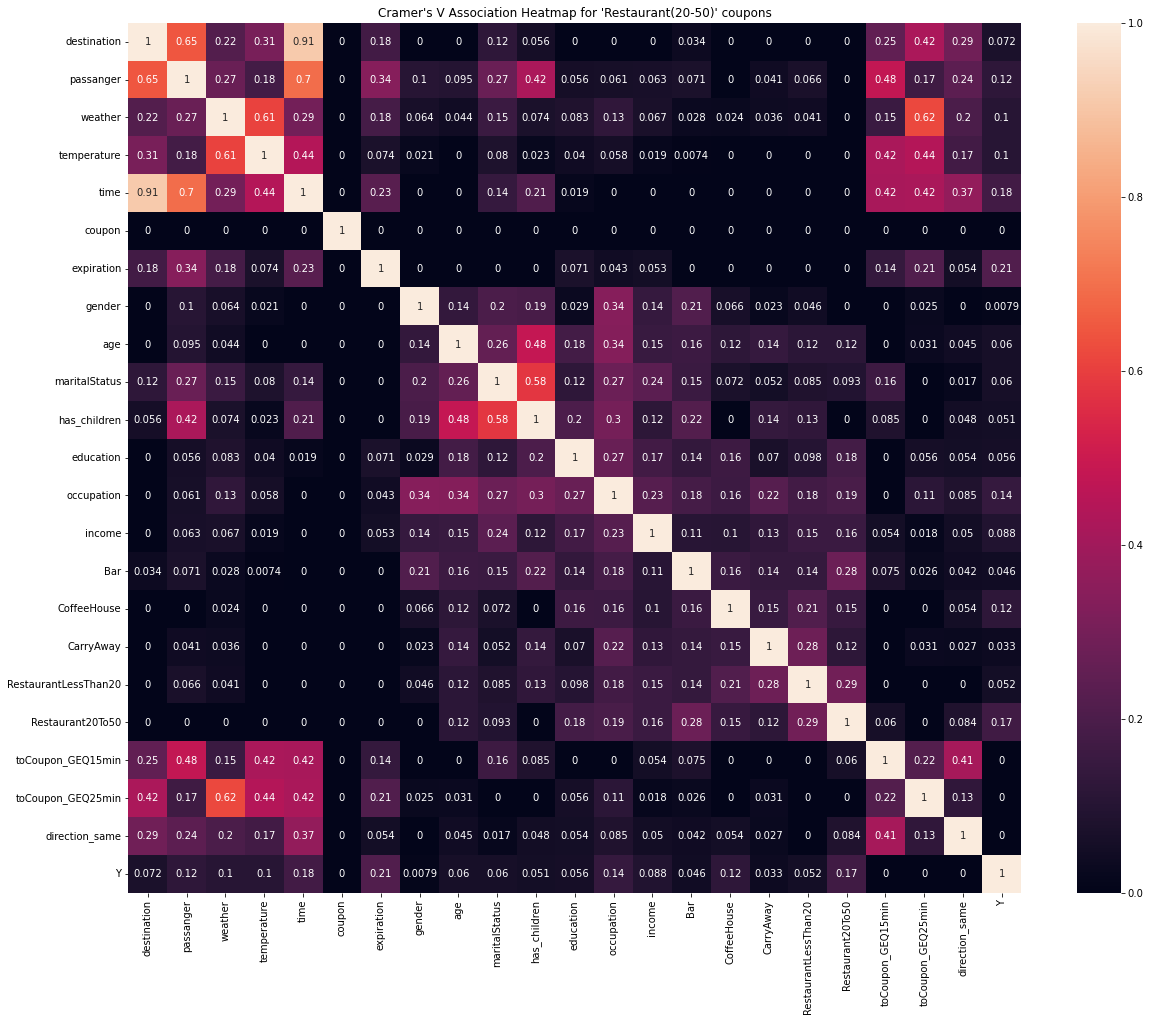

In [72]:
#Now let us apply the Cramer V function to the 'Restaurant(20-50)' Coupons
cramer_v = cramer_v_matrix(df_r20_50)
plt.figure(figsize=(20, 16))
sns.heatmap(cramer_v, annot=True, xticklabels=df.columns, yticklabels=df.columns)
plt.title("Cramer's V Association Heatmap for 'Restaurant(20-50)' coupons")
plt.show()

**Observations:**

When it comes to the data on acceptance of Restaurants 20-50 coupons, the following features have Strong association (over 0.6):

- Time and Destination: 0.91
- Passenger and Time: 0.7
- Passenger and Destination: 0.65
- toCoupon_GEQ25min and Weather: 0.62
- Temperature and Weather: 0.61

The following pairs of variables have "Decent" association (between 0.4 and 0.6)

- Has Children and Marital Status
- ToCoupon_GEQ15 min and Passenger
- ToCoupon_GEQ15 min and Temperature
- ToCoupon_GEQ15 min and Time
- ToCoupon_GEQ25 min and Temperature
- ToCoupon_GEQ25 min and Time
- ToCoupon_GEQ25 min and Destination
- Direction Same and ToCoupon_GEQ15
- Direction Opposite and ToCoupon_GEQ15
- Has Children and Passenger
- Passenger and Destination

The strongest predictors of the acceptance of the Bar coupon (the Y variable) are:
- Expiration
- Time
- Restaurant 20 to 50 attendance (not surprisingly)
- Occupation
- Coffee House attendance
- Passenger
These will be the variables that will likely have significant contribution to the future model that predict the likelihood of accepting the Restaurants 20-50 coupons


# 'Restaurant(<20)' Coupon Variable Association Study

In [73]:
# first, let us filter the main dataframe to contain only 'Restaurant(20-50)' coupons
df_r20 = df[df['coupon'] == 'Restaurant(<20)'] 
#let us look at a sample of the new dataframe
df_r20.sample(3)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y
3657,No Urgent Place,Kid(s),Sunny,55,2PM,Restaurant(<20),1d,Female,31,Married partner,1,Bachelors degree,Sales & Related,$12500 - $24999,0,1~3,1~3,1~3,0,1,0,0,1
4013,Home,Alone,Sunny,80,10PM,Restaurant(<20),2h,Female,50plus,Married partner,1,Graduate degree (Masters or Doctorate),Education&Training&Library,$100000 or More,4~8,gt8,4~8,4~8,4~8,0,0,1,1
5349,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(<20),2h,Female,26,Unmarried partner,0,Associates degree,Office & Administrative Support,$12500 - $24999,0,1~3,1~3,1~3,1~3,1,0,0,1


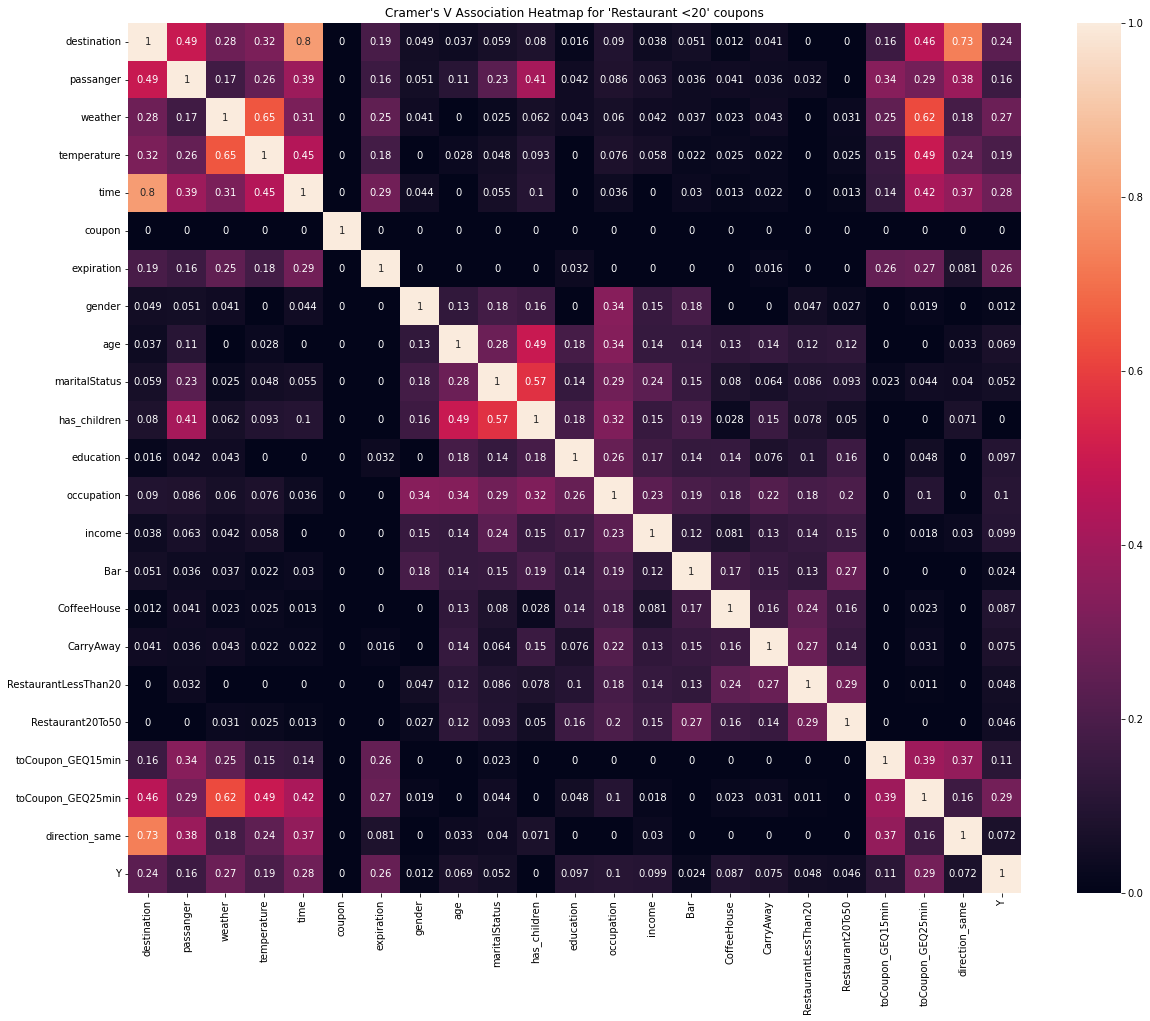

In [74]:
#Now let us apply the Cramer V function to the 'Restaurant(20-50)' Coupons
cramer_v = cramer_v_matrix(df_r20)
plt.figure(figsize=(20, 16))
sns.heatmap(cramer_v, annot=True, xticklabels=df.columns, yticklabels=df.columns)
plt.title("Cramer's V Association Heatmap for 'Restaurant <20' coupons")
plt.show()

**Observations:**

When it comes to the data on acceptance of Restaurants 20-50 coupons, the following features have Strong association (over 0.6):

- Time and Destination: 0.8
- Direction Same and Destination: 0.73
- Direction Opposite and Destination: 0.73
- Temperature and Weather: 0.65 (as one would expect)
- ToCoupon_GEQ25 min and Weather: 0.62

The following pairs of variables have "Decent" association (between 0.4 and 0.6):
    
- Has Children and Marital Status
- Passenger and Destination
- Time and Temperature
- ToCoupon_GEQ25 min and Destination
- ToCoupon_GEQ25 min and Temperature
- ToCoupon_GEQ25 min and Time
- Has Childre and Passenger

The strongest predictors of the acceptance of the Bar coupon (the Y variable) are:
- ToCoupon_GEQ25
- Time
- Weather
- Expiration
- Destination
- Temperature
- Passenger
- ToCoupon_GEQ15

Those will likely be most useful (impactful) variables in the future models that predict acceptance of the cheap restaurant coupons.

## General Observations from Statistical Analysis:
1. When it comes to the association to the "Y" variable (the coupon acceptance), the specialized data frames (those filtered to specific coupons), produce greater variable association as compared to the data frame that contains all coupons. This is not surprising, because both the users and the contextual variables that influence each type of coupon acceptance are different. For example, one is more likely to accept a Coffee shop coupon in the morning and a Bar coupon in the evening. So, when we create models for this data, it would be a good idea to model the acceptance of each type of coupon separately--as opposed to creating a generic model that predicts acceptance of any type of coupon.

2. I expect that there will be some interactions between variables. I.e., The effect of two or more variables could be different than the combined effect of each of them. Therefore, the best way to see what variables are most impactful is to go ahead and build the model.

    